# Chapter 11: Density Estimation with Gaussian Mixture Models

本章介绍机器学习领域的第三大支柱问题： density estimation。为了更简单有效地表示数据， 我们通常用一族概率分布模型（比如：高斯分布）来表示数据， 模型的参数可以用之前讨论过的 MLE 或 MAP estimation 方法得到。 但是有时候单一一族地概率分布模型可能并不能很好地表示给定的数据， 我们就需要引入 `mixture model`（混合模型） 的概念。 本章主要探讨 Gaussian mixture models 的密度估计问题。 

**本章主要内容**
* Expectation maximization 算法
* 从隐藏变量角度着手混合模型的密度估计问题

## 11.1 Gaussian Mixture model

高斯混合模型是由有限个高斯分布结合而成的：

$$
\begin{array}{l}
p(x \mid \theta)=\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(x \mid \mu_{k},\Sigma_{k}\right) \\
0 \leqslant \pi_{k} \leqslant 1, \quad \sum_{k=1}^{K} \pi_{k}=1
\end{array}
$$

其中， $\theta = \{\mu_k, \Sigma_k, \pi_k:k=1, ..., K\}$ 是模型的所有参数。 比起单一的高斯模型， 混合高斯模型能让我们更灵活地表示更复杂的数据。 

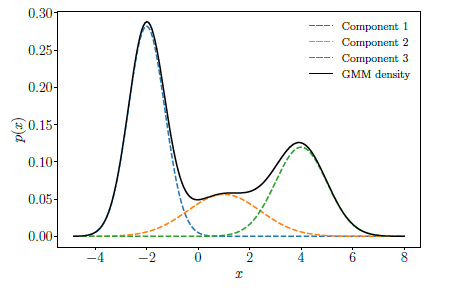

如图片所示， 混合高斯模型能表示多峰数据分布， 比起只能够表示单峰的 single 高斯模型来说， 混合高斯模型对数据有更强大的表现能力。



## 11.2 Parameter Learning via Maximum Likelihood

假设有数据集 $\mathcal{X} = {x_1, ..., x_N}$， 其中 $x_n, n=1, ..., N$ i.i.d 并且来自于同一个未知分布 $p(x)$。

我们的目标是通过 $K$ 个混合成分来找到对 $p(x)$ 的很好表示。 要确定的参数有 $K$ 个平均 $\mu_k$, covariance $\Sigma_k$， 混合权重 $\pi_k$。 我们用 $\theta = \{\mu_k, \Sigma_k, \pi_k:k=1, ..., K\}$ 来表示所有参数的集合。

接下来我们讨论如何通过 MLE 得到对模型参数的预测 $\theta_{ML}$。 

似然函数可以写作如下：


$$
p(\mathcal{X} \mid \theta)=\prod_{n=1}^{N} p\left(x_{n} \mid \theta\right), \quad p\left(x_{n} \mid \theta\right)=\sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(x_{n} \mid \mu_{k}, \Sigma_{k}\right)
$$

其中， $p(x_n \mid \theta)$ 是高斯混合密度。 

写成似然函数写成 log 形式有：

$$
\log p(\mathcal{X} \mid \theta)=\sum_{n=1}^{N} \log p\left(x_{n} \mid \theta\right)=\underbrace{\sum_{n=1}^{N} \log \sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(x_{n} \mid \mu_{k}, \Sigma_{k}\right)}_{=: \mathcal{L}}
$$

注意上式这样的形式我们无法直接对 $\theta$ 求导，令导数为零然后求出 $\theta$。 但是我们可以用 iterative scheme 找到 $\theta_{ML}$: 其他成分模型保持不变的情况下，只更新一个成分模型的参数。 这种算法也叫 Expectation Maximization (EM) 算法。 

函数在局部最优值处的梯度为零， 所以当我们想最优 log-likelihood 时必须满足以下三式：

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mu_{k}} &=\mathbf{0}^{\top} \Longleftrightarrow \sum_{n=1}^{N} \frac{\partial \log p\left(x_{n} \mid \theta\right)}{\partial \mu_{k}}=\mathbf{0}^{\top} \\
\frac{\partial \mathcal{L}}{\partial \Sigma_{k}} &=\mathbf{0} \Longleftrightarrow \sum_{n=1}^{N} \frac{\partial \log p\left(x_{n} \mid \boldsymbol{\theta}\right)}{\partial \Sigma_{k}}=\mathbf{0} \\
\frac{\partial \mathcal{L}}{\partial \pi_{k}} &=0 \Longleftrightarrow \sum_{n=1}^{N} \frac{\partial \log p\left(x_{n} \mid \theta\right)}{\partial \pi_{k}}=0
\end{aligned}
$$

根据 chain rule， 我们有：

$$
\frac{\partial \log p\left(x_{n} \mid \theta\right)}{\partial \theta}=\frac{1}{p\left(x_{n} \mid \theta\right)} \frac{\partial p\left(x_{n} \mid \theta\right)}{\partial \theta}
$$

其中：

$$
\frac{1}{p\left(x_{n} \mid \theta\right)}=\frac{1}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(x_{n} \mid \mu_{j}, \Sigma_{j}\right)}
$$

接下来我们会求上面分别对 $\mu_k, \Sigma_k, \pi_k$ 的偏导数。 但是在这之前， 我们首先介绍下本章最重要的一个概念：` responsibility`。 

### 11.2.1 Responsibilities

Responsibility 的定义式如下：

$$
r_{n k}:=\frac{\pi_{k} \mathcal{N}\left(x_{n} \mid \mu_{k}, \mathbf{\Sigma}_{k}\right)}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(x_{n} \mid \mu_{j}, \mathbf{\Sigma}_{j}\right)}
$$

这里的 $r_{nk}$ 被称作第 $k$ 个成分对第 $n$ 个数据 $x_n$ 的 responsibility, 并且 $r_{nk} \propto p(x_n \mid \pi_k, \mu_k, \Sigma_k)$。 也就是说如果数据实从该成分 sample 出来的， 那么 $p(x_n \mid \pi_k, \mu_k, \Sigma_k)$ 就会高， 那么自然 $r_{nk}$ 也会高。

$r_n = [r_{n1}, ..., r_{nK}]^{\top} \in \mathbb{R}^K$， 记录了每个成分对数据点 $n$ 的 responsibility， 其中 $\sum_k r_{nk} =1$。 $r_{nk}$ 也可以理解为 $x_n$ 从第 $k$ 个成分中生成的概率。 

接下来我们根据 responsibilities 更新模型的参数 $\mu_k, \Sigma_k, \pi_k$。 

### 11.2.2 Updating the Means

$\mu_k$ 的更新式如下：

$$
\mu_{k}^{\text {new }}=\frac{\sum_{n=1}^{N} r_{n k} x_{n}}{\sum_{n=1}^{N} r_{n k}}
$$

下面是推导过程：

前面我们对 $\mathcal{L}$ 求 $\mu_k$ 的偏导数有：


$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mu_{k}} &= \sum_{n=1}^{N} \frac{\partial \log p\left(x_{n} \mid \theta\right)}{\partial \mu_{k}} =\sum_{n=1}^{N} \frac{1}{p\left(x_{n} \mid \theta\right)} \frac{\partial p\left(x_{n} \mid \theta\right)}{\partial \mu_k} \\
&= \sum_{n=1}^{N} \frac{1}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(x_{n} \mid \mu_{j}, \Sigma_{j}\right)} \sum_{j=1}^{K} \pi_{j} \frac{\partial \mathcal{N}\left(x_{n} \mid \mu_{j}, \Sigma_{j}\right)}{\partial \mu_{k}} \\
&= \sum_{n=1}^{N} \frac{1}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(x_{n} \mid \mu_{j}, \Sigma_{j}\right)} \pi_{k} \frac{\partial \mathcal{N}\left(x_{n} \mid \mu_{k}, \Sigma_{k}\right)}{\partial \mu_{k}} \\
&= \sum_{n=1}^{N} \frac{1}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(x_{n} \mid \mu_{j}, \Sigma_{j}\right)}\pi_{k}\left(x_{n}-\mu_{k}\right)^{\top} \Sigma_{k}^{-1} \mathcal{N}\left(x_{n} \mid \mu_{k}, \Sigma_{k}\right) \\
&= \sum_{n=1}^{N}\left(x_{n}-\mu_{k}\right)^{\top} \Sigma_{k}^{-1} \underbrace{\frac{\pi_{k} \mathcal{N}\left(x_{n} \mid \mu_{k}, \Sigma_{k}\right)}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(x_{n} \mid \mu_{j}, \Sigma_{j}\right)}}_{=r_{n k}} \\
&=\sum_{n=1}^{N} r_{n k}\left(x_{n}-\mu_{k}\right)^{\top} \Sigma_{k}^{-1}
\end{aligned}
$$

令偏导数为 0， 我们有：

$$\sum_{n=1}^{N} r_{n k} x_{n}=\sum_{n=1}^{N} r_{n k} \mu_{k}^{\text {new }} \Longleftrightarrow \mu_{k}^{\text {new }}=\frac{\sum_{n=1}^{N} r_{n k} x_{n}}{\sum_{n=1}^{N} r_{n k}}=\frac{1}{N_k} \sum_{n=1}^{N} r_{n k} x_{n}$$

其中， $N_k = \sum_{n=1}^{N}r_{nk}$, 是第 $k$ 个成分对整个数据集的总 responsibility。 

说下个人理解：
* $\mu_{k}^{\text {new }}$ 可以这样理解， 一个模型对好多数据有 responsibility, 但是最终模型的 $\mu$ 在哪决定于对各个数据的 responsibility。 如果对一个数据的 responsibility 特别大， 那么 $\mu$ 就会被很大程度上拉往那个数据点的附近。 

### 11.2.3 Updating the Covariances

$\Sigma_k$ 的更新式如下：

$$
\Sigma_{k}^{n e w}=\frac{1}{N_{k}} \sum_{n=1}^{N} r_{n k}\left(x_{n}-\mu_{k}\right)\left(x_{n}-\mu_{k}\right)^{\top}
$$

下面是推导过程：

对 $\mathcal{L} 求 \Sigma_{k}$ 的偏导数， 可得：

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \Sigma_{k}} &= \sum_{n=1}^{N} \frac{\partial \log p\left(x_{n} \mid \theta\right)}{\partial \Sigma_{k}} =\sum_{n=1}^{N} \frac{1}{p\left(x_{n} \mid \theta\right)} \frac{\partial p\left(x_{n} \mid \theta\right)}{\partial \Sigma_k} \\
&= \sum_{n=1}^{N} \frac{1}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(x_{n} \mid \mu_{j}, \Sigma_{j}\right)} \sum_{j=1}^{K} \pi_{j} \frac{\partial \mathcal{N}\left(x_{n} \mid \mu_{j}, \Sigma_{j}\right)}{\partial \Sigma_{k}} \\
 &= \sum_{n=1}^{N} \underbrace{\frac{1}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(x_{n} \mid \mu_{j}, \Sigma_{j}\right)} }_{\frac{1}{p\left(x_{n} \mid \theta\right)} }\underbrace{\pi_{k}\mathcal{N}\left(x_{n} \mid \mu_{k}, \Sigma_{k}\right) \cdot\left[-\frac{1}{2}\left(\Sigma_{k}^{-1}-\Sigma_{k}^{-1}\left(x_{n}-\mu_{k}\right)\left(x_{n}-\mu_{k}\right)^{\top} \Sigma_{k}^{-1}\right)\right]}_{\frac{\partial \log p\left(x_{n} \mid \theta\right)}{\partial \Sigma_{k}}}\\
&= \sum_{n=1}^{N}\underbrace{\frac{\pi_{k} \mathcal{N}\left(x_{n} \mid \mu_{k}, \Sigma_{k}\right)}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(x_{n} \mid \mu_{j}, \Sigma_{j}\right)}}_{=r_{n k}} \cdot \left[-\frac{1}{2}\left(\Sigma_{k}^{-1}-\Sigma_{k}^{-1}\left(x_{n}-\mu_{k}\right)\left(x_{n}-\mu_{k}\right)^{\top} \Sigma_{k}^{-1}\right)\right]\\
&= -\frac{1}{2} \Sigma_{k}^{-1} \underbrace{\sum_{n=1}^{N} r_{n k}}_{=N_{k}}+\frac{1}{2} \Sigma_{k}^{-1}\left(\sum_{n=1}^{N} r_{n k}\left(x_{n}-\mu_{k}\right)\left(x_{n}-\mu_{k}\right)^{\top}\right) \Sigma_{k}^{-1}
\end{aligned}
$$

令偏导数为零， 可得：

$$
\begin{aligned}
N_{k} \Sigma_{k}^{-1} &=\Sigma_{k}^{-1}\left(\sum_{n=1}^{N} r_{n k}\left(x_{n}-\mu_{k}\right)\left(x_{n}-\mu_{k}\right)^{\top}\right) \Sigma_{k}^{-1} \\
\Longleftrightarrow N_{k} I &=\left(\sum_{n=1}^{N} r_{n k}\left(x_{n}-\mu_{k}\right)\left(x_{n}-\mu_{k}\right)^{\top}\right) \Sigma_{k}^{-1}
\end{aligned}
$$

解方程可得 $\Sigma_{k}^{new}$:


$$
\boldsymbol{\Sigma}_{k}^{\mathrm{new}}=\frac{1}{N_{k}} \sum_{n=1}^{N} r_{n k}\left(x_{n}-\mu_{k}\right)\left(x_{n}-\mu_{k}\right)^{\top}
$$


### 11.2.4 Updating the Mixture Weights

$\pi_k$ 的更新式如下：

$$\pi_k^{new} = \frac{N_k}{N}, k=1, ..., K$$

下面是推导过程：

把 $\sum_k \pi_k = 1$ 的约束条件用拉格朗日乘数法引入 $\mathcal{L}$ 中, 可得 Lagrangian：

$$
\begin{aligned}
\mathfrak{L}&=\mathcal{L}+\lambda\left(\sum_{k=1}^{K} \pi_{k}-1\right)\\
&= \sum_{n=1}^{N} \log \sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(x_{n} \mid \boldsymbol{\mu}_{k}, \Sigma_{k}\right)+\lambda\left(\sum_{k=1}^{K} \pi_{k}-1\right)
\end{aligned}
$$

对 Lagrangian 求 $\pi_k$ 的偏导数：


$$
\begin{aligned}
\frac{\partial \mathfrak{L}}{\partial \pi_{k}} &=\sum_{n=1}^{N}\underbrace{ \frac{\mathcal{N}\left(x_{n} \mid \mu_{k}, \mathbf{\Sigma}_{k}\right)}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(x_{n} \mid \mu_{j}, \mathbf{\Sigma}_{j}\right)}}_{r_{nk}}+\lambda \\
&=\frac{1}{\pi_{k}} \underbrace{\sum_{n=1}^{N} \frac{\pi_{k} \mathcal{N}\left(\boldsymbol{x}_{n} \mid \mu_{k}, \Sigma_{k}\right)}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(x_{n} \mid \mu_{j}, \Sigma_{j}\right)}}_{=N_{k}}+\lambda=\frac{N_{k}}{\pi_{k}}+\lambda
\end{aligned}
$$

对 Lagrangian 求 $\lambda$ 的偏导数：

$$\frac{\partial \mathfrak{L}}{\partial \lambda} = \sum_{k=1}^{K}\pi_k - 1$$

分别令两个偏导数为0， 可得：

$$
\begin{aligned}
\pi_{k} &=-\frac{N_{k}}{\lambda} \\
1&=\sum_{k=1}^{K} \pi_{k}
\end{aligned}
$$

联立可得：

$$\pi_k^{new} = \frac{N_k}{N}, k=1, ..., K$$

注：
* $N = \sum_{k} N_k, \lambda= -N $

个人见解： 
* $\pi_k^{new}$ 的式子可以这么理解, 每个模型对所有数据点的 responsibility 求和然后取平均 (算是该模型对所有数据点的平均 responsibility 吧)， 这个数值越高，说明该模型对所有数据点的 responsibility 越高， 那当然该模型的权重也应该越高。 

## 11.3 EM Algorithm

前面我们得到的三个更新式都不是 closed-form solution， 因为更新式中的 $r_{nk}$ 还是跟这些参数有复杂联系的。 但是我们却可以通过 iterative scheme 找到想要的解。 

EM 算法就是一种通过 iterative scheme 来学习混合模型参数的方法。每一次的更新都会使 maximum likelihood 变大， 所以我们可以通过 log-likelihood 或者看参数检查是否已经收敛 （如果都不怎么变化了， 证明收敛了）。 在我们前面的高斯混合模型例子中， 具体操作如下：
1. 初始化 $\mu_k, \Sigma_k, \pi_k$
2. E-step： 计算 responsibilities 
$$
r_{n k}:=\frac{\pi_{k} \mathcal{N}\left(x_{n} \mid \mu_{k}, \mathbf{\Sigma}_{k}\right)}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(x_{n} \mid \mu_{j}, \mathbf{\Sigma}_{j}\right)}
$$
3. M-step: 运用更新过的 responsibilities 对参数 $\mu_k, \Sigma_k, \pi_k$ 进行再预测:


$$
\begin{aligned}
\mu_{k} &=\frac{1}{N_{k}} \sum_{n=1}^{N} r_{n k} x_{n} \\
\Sigma_{k} &=\frac{1}{N_{k}} \sum_{n=1}^{N} r_{n k}\left(x_{n}-\mu_{k}\right)\left(x_{n}-\mu_{k}\right)^{\top} \\
\pi_{k} &=\frac{N_{k}}{N}
\end{aligned}
$$

## 11.4 Latent-Variable Perspective 

本小节通过引入隐藏变量，构建概率模型来理解 GMM 问题。

我们引入隐藏变量 $z_k\in\{0, 1\}$ 来表示数据点是否由第 $k$ 个模型生成的：

$$
p\left(x \mid z_{k}=1\right)=\mathcal{N}\left(x \mid \boldsymbol{\mu}_{k}, \mathbf{\Sigma}_{k}\right)
$$

假设有 $z=[z_1, ..., z_K]^{\top} \in \mathbb{K}$ （是 one-hot encoding）。 $z$ 的先验概率 $p(z)$ 如下：

$$
p(z)=\pi=\left[\pi_{1}, \ldots, \pi_{K}\right]^{\top}, \quad \sum_{k=1}^{K} \pi_{k}=1
$$

其中 $\pi_k = p(z_k=1)$ 表示的是数据点 $x$ 由第 $k$ 个模型生成的概率。 

那么我们可以得到如下生成过程：

1. Sample $z^{(i)}\sim p(z)$
2. Sample $x^{(i)}\sim p(x\mid z^{(i)}=1)$

隐藏变量 $z_k$ 和 数据点 $x$ 的联合概率分布为：

$$
p\left(x, z_{k}=1\right)=p\left(x \mid z_{k}=1\right) p\left(z_{k}=1\right)=\pi_{k} \mathcal{N}\left(x\mid \mu_{k}, \Sigma_{k}\right)
$$

完整的概率模型可以定义如下：

$$
p(x, z)=\left[\begin{array}{c}
p\left(x, z_{1}=1\right) \\
\vdots \\
p\left(x, z_{K}=1\right)
\end{array}\right]=\left[\begin{array}{c}
\pi_{1} \mathcal{N}\left(x\mid \mu_{1}, \Sigma_{1}\right) \\
\vdots \\
\pi_{K} \mathcal{N}\left(x \mid \mu_{K}, \Sigma_{K}\right)
\end{array}\right]
$$


### 11.4.2 Likelihood

按照下面的式子， 我们可以得到似然函数 $p(x\mid \theta)$:

$$
p(x \mid \theta)=\sum_{z} p(x \mid \theta, z) p(z \mid \theta), \quad \theta:=\left\{\mu_{k}, \Sigma_{k}, \pi_{k}: k=1, \ldots, K\right\}
$$

对所有可能的 $z$ 相加相当于只考虑 $z_k =1$的情况， 可得：

$$
\begin{aligned}
p(x \mid \theta) &=\sum_{z} p(x\mid \theta, z) p(z \mid \theta) \\
&=\sum_{k=1}^{K} p\left(x \mid \theta, z_{k}=1\right) p\left(z_{k}=1 \mid \theta \right)\\
&= \sum_{k=1}^{K}\pi_{k} \mathcal{N}\left(x\mid \mu_{k}, \Sigma_{k}\right)
\end{aligned}
$$

给定数据集 $\mathcal{X}$, 那么似然函数如下：

$$
p(\mathcal{X} \mid \theta)=\prod_{n=1}^{N} p\left(x_{n} \mid \theta \right) = \prod_{n=1}^{N} \sum_{k=1}^{K} \pi_{k} \mathcal{N}\left(x_{n} \mid \mu_{k}, \Sigma_{k}\right)
$$


### 11.4.3 Posterior Distribution

根据贝叶斯定理， 隐藏变量 $z_k$ 的后验概率如下：

$$
p\left(z_{k}=1 \mid x, \mu_k, \Sigma_k\right)=\frac{p\left(z_{k}=1\right) p\left(x \mid z_{k}=1, \mu_k, \Sigma_k\right)}{\sum_{j=1}^{K} p\left(z_{j}=1\right) p\left(x \mid z_{j}=1 ,\mu_k, \Sigma_k\right)}=\frac{\pi_{k} \mathcal{N}\left(x \mid \mu_{k}, \mathbf{\Sigma}_{k}\right)}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(x \mid \mu_{j}, \mathbf{\Sigma}_{j}\right)}
$$

也就是我们之前的 responsibility 定义式！！！

### 11.4.4 Extensions to a Full Dataset 

现在我们考虑有 $N$ 个数据点的数据集 $\mathcal{X} = \{x_1, ..., x_N\}$。 

每个数据点 $x_n$ 都有自己的隐藏变量：

$$z_n=[z_{n1}, ..., z_{nK}]^{\top}\in \mathbb{R}^K$$

条件概率 $p\left(x_{1}, \ldots, x_{N} \mid z_{1}, \ldots, z_{N}\right)$ 计算方式如下：

$$
p\left(x_{1}, \ldots, x_{N} \mid z_{1}, \ldots, z_{N}\right)=\prod_{n=1}^{N} p\left(x_{n} \mid z_{n}\right)
$$

后验概率 $p(z_{nk}=1 \mid x_n)$ 计算方式如下：

$$
\begin{aligned}
p\left(z_{n k}=1 \mid x_{n}\right) &=\frac{p\left(x_{n} \mid z_{n k}=1\right) p\left(z_{n k}=1\right)}{\sum_{j=1}^{K} p\left(x_{n} \mid z_{n j}=1\right) p\left(z_{n j}=1\right)} \\
&=\frac{\pi_{k} \mathcal{N}\left(x_{n} \mid \mu_{k}, \Sigma_{k}\right)}{\sum_{j=1}^{K} \pi_{j} \mathcal{N}\left(x_{n} \mid \mu_{j}, \mathbf{\Sigma}_{j}\right)}=r_{n k}
\end{aligned}
$$

### 11.4.5 EM Algorithm Revisited

用隐藏变量的角度回顾下 EM 算法：

在给定模型参数为 $\theta^{t}$ 的情况下：

1. E-step: 计算 expected log-likelihood:

$$
\begin{aligned}
Q\left(\boldsymbol{\theta} \mid \boldsymbol{\theta}^{(t)}\right) &=\mathbb{E}_{\boldsymbol{z} \mid \boldsymbol{x}, \boldsymbol{\theta}^{(t)}}[\log p(\boldsymbol{x}, \boldsymbol{z} \mid \boldsymbol{\theta})] \\
&=\int \log p(\boldsymbol{x}, \boldsymbol{z} \mid \boldsymbol{\theta}) p\left(\boldsymbol{z} \mid \boldsymbol{x}, \boldsymbol{\theta}^{(t)}\right) \mathrm{d} \boldsymbol{z}
\end{aligned}
$$

2. M-step: 通过最大化上式，得到更新后的模型参数 $\theta^{(t+1)}$

虽然 EM iteration 会增加 log-likelihood， 但是并不能保证 EM 会收敛至 maximum likelihood solution。 EM 可能会收敛至 log-likelihood 的局部最大值。 